# Logistic Regression

In [1]:
# data - Generate using numpy
import numpy as np
import matplotlib.pyplot as plt



In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1, 1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02,500)


In [3]:
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


In [4]:
 data = np.zeros((1000, 3))

In [5]:
data[:500,:2]= dist_01
data[500:, :2] = dist_02

data[500:,-1] = 1

In [6]:
np.random.shuffle(data)
print(data[:10])

[[ 0.80990532  4.35242837  1.        ]
 [-0.23458218  1.56722903  0.        ]
 [ 5.80331617  3.87694728  1.        ]
 [ 3.2179418   4.9297838   1.        ]
 [ 0.41042279  2.0612512   0.        ]
 [ 4.15893419  4.69169763  1.        ]
 [ 6.24657842  3.25448546  1.        ]
 [-0.96104232  1.62218266  0.        ]
 [ 0.50956977 -0.0999923   0.        ]
 [ 4.03247862  4.45468907  1.        ]]


In [7]:
# # devide the data into train and b
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(data[:,:-1], data[:,-1], test_size= 0.2 , random_state= 43 )

In [8]:
X_train

array([[0.09041324, 0.70114739],
       [3.40682196, 6.92088266],
       [1.0381164 , 1.23408056],
       ...,
       [2.95480462, 6.83298179],
       [1.84065983, 1.45465524],
       [4.65002044, 4.41499122]])

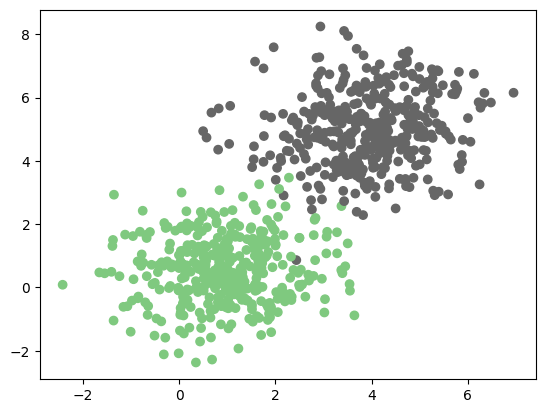

In [9]:
# plot the data
plt.scatter(X_train[:,0], X_train[:,1] , c = Y_train , cmap= plt.cm.Accent)
plt.show()

In [10]:
# data normalisation
x_mean = np.mean(X_train, axis=0)
std = np.mean(X_train, axis=0)

In [11]:
# apply the transformation
X_train = (X_train - x_mean )/std

#apply the same transformation [] on test data
X_test = (X_test - x_mean)/std


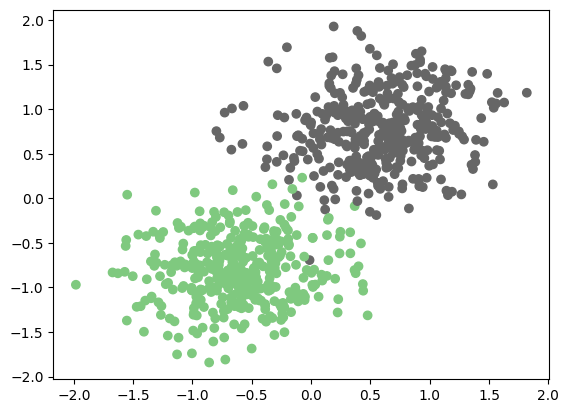

In [12]:

# plot the data
plt.scatter(X_train[:,0], X_train[:,1] , c = Y_train , cmap= plt.cm.Accent)
plt.show()


### whole data in above scatter plot after normalisation is centred around 0

# Logistic regression implemention 

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    """
    X - entire array(m, n+1)
    theta = np.array(n+1,1)
    """
    
    return sigmoid(np.dot(X, theta))

def error(X, y, theta):
    """
    params : 
    X - (m, n+1)
    y- (m,1)
    theta - (n+1,1)
    
    return : loss
    """
    hi = hypothesis(X, theta)
    e = -1*np.mean((y*np.log(hi) + (1-y)*np.log(1-hi)))
    
    return e


def gradient(X, y , theta):
    """
    params : 
    X - (m, n+1)
    y- (m,1)
    theta - (n+1,1)
    
    return :
         gradient_vector - (n+1, 1)
    """
    
    hi = hypothesis(X, theta)
    grad = - np.dot(X.T, (y-hi))
    m = X.shape[0]
    return grad/m

    
def gradient_descent(X,y , learning_rate = 0.5, max_epoch = 500):
    """
    theta = (n+1, 1)
    """
    n = X.shape[1]
    theta = np.zeros((n,1))
    
    error_list = []
    
    
    for i in range(max_epoch):
        err = error(X , y , theta)
        error_list.append(err)
        
        
        grad = gradient(X , y , theta)
        
        #update
        theta = theta - learning_rate*grad
    
    return (theta, error_list)


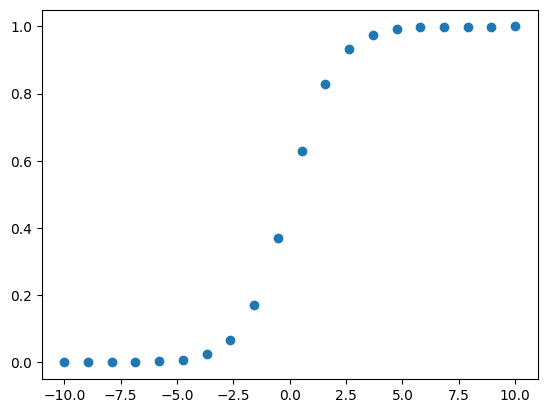

In [14]:
a = np.linspace(-10, 10 , 20)
plt.scatter(a, sigmoid(a))

In [15]:
ones = np.ones((X_train.shape[0], 1))
X_new = np.hstack((ones, X_train))

Y_train = Y_train.reshape(-1,1)

In [16]:
theta , error_list = gradient_descent(X_new, Y_train)

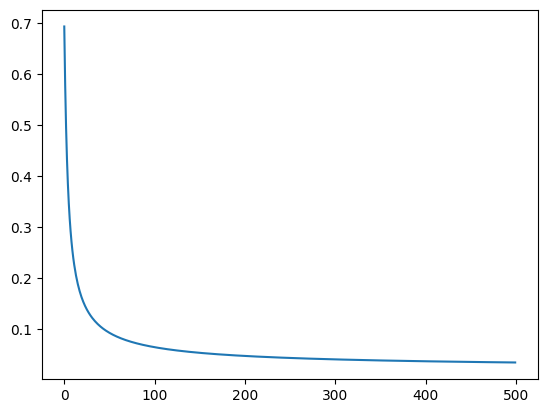

In [17]:
plt.plot(error_list)  

In [18]:
theta

array([[0.2398007 ],
       [3.25849066],
       [5.22769227]])

# Decision surface Visualisation

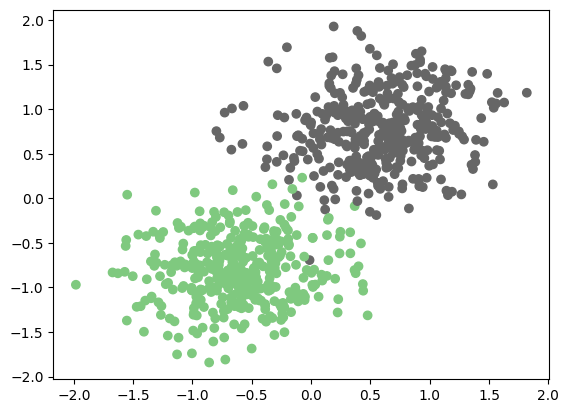

In [19]:
# plot the data
plt.scatter(X_train[:,0], X_train[:,1] , c = Y_train.reshape((-1,)) , cmap= plt.cm.Accent)

plt.show()

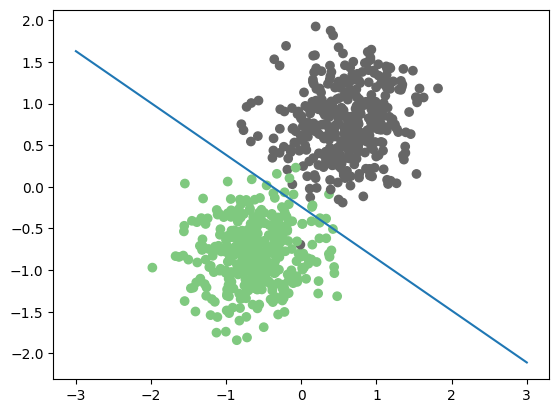

In [20]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1/theta[2])
plt.scatter(X_train[:,0], X_train[:,1] , c = Y_train.reshape((-1,)) , cmap= plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

In [28]:
# Prediction and accuracy
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    
    output[h>=0.5] = 1
    output  = output.astype('int')
    
    return output

Xt_pred = predict(X_new, theta)
    

In [29]:
def accuracy(actual , pred):
    
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = (np.sum(actual == Xt_pred))/actual.shape[0]
    
    return acc*100

In [27]:
train_acc = accuracy(Y_train, Xt_pred)
print(train_acc)

99.375


# using sklearn

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
theta_0 = model.intercept_
theta_s = model.coef_

print(theta_0 , theta_s)

[0.2390496] [[2.99089098 5.05804924]]


In [35]:
model.score(X_train, Y_train)

0.9925

In [36]:
model.score(X_test, Y_test)

1.0

In [37]:
y_pred = model.predict(X_test)